In [137]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt

In [138]:
adult = pd.read_csv('./data/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])

country_counter = adult['native-country'].value_counts().to_dict()
adult['native-country'] = adult['native-country'].apply(lambda x:
                                                        'Other' if country_counter.get(x) < 100
                                                        else x.strip())
adult['native-country'].value_counts()

United-States    29170
Other             1389
Mexico             643
?                  583
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Name: native-country, dtype: int64

In [139]:
def prepare_adult_data():
    adult = pd.read_csv('./data/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])

    # Избавиться от лишних признаков
    #adult.drop(['native-country'], axis=1, inplace=True)
    country_counter = adult['native-country'].value_counts().to_dict()
    adult['native-country'] = adult['native-country'].apply(lambda x:
                                                            'Other' if country_counter.get(x) < 100
                                                            else x.strip())
    adult['native-country'].value_counts()

    # Сконвертировать целевой столбец в бинарные значения
    adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
    # Сделать one-hot encoding для некоторых признаков
    adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                                           'race', 'sex', 'native-country'])

    # Нормализовать нуждающиеся в этом признаки
    a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
    norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
    adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

    # Разбить таблицу данных на матрицы X и y
    X = adult[list(set(adult.columns) - set(['salary']))].values
    y = adult['salary'].values

    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

    return X, y

X, y = prepare_adult_data()

In [143]:
def print_logisitc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.4f} F1-score = {f1:.4f}')

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)
у_pred_proba = model.predict_proba(X)

print_logisitc_metrics(y, y_pred)

acc = 0.8526 F1-score = 0.6632


In [141]:
print(confusion_matrix(y, y_pred))

[[23035  1685]
 [ 3114  4727]]


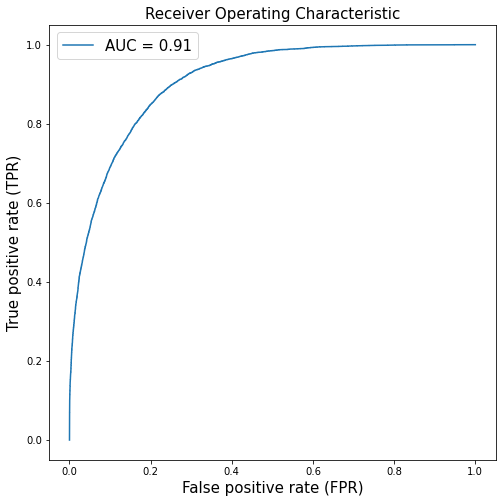

In [142]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

calc_and_plot_roc(y, у_pred_proba[:, 1])

